### Hierarchical clustering (계층적 군집 분석)

Hierarchical clustering (계층적 군집 분석) 은 비슷한 군집끼리 묶어 가면서 최종 적으로는 하나의 케이스가 될때까지 군집을 묶는 클러스터링 알고리즘이다.

군집간의 거리를 기반으로 클러스터링을 하는 알고리즘이며, K Means와는 다르게 군집의 수를 미리 정해주지 않아도 된다. 

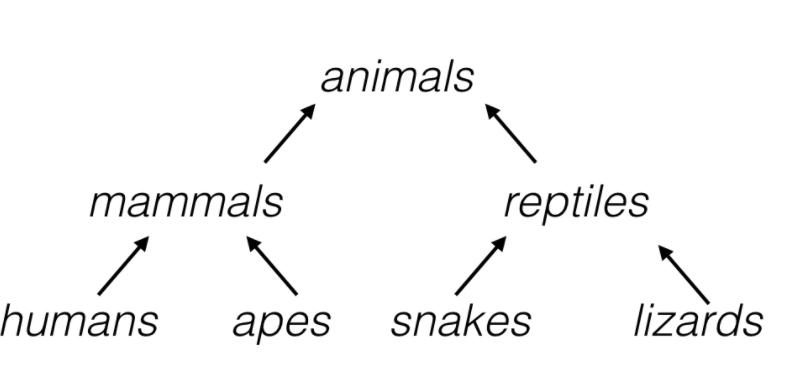

(인간, 유인원) , (뱀, 도마뱀) 으로 군집이 묶인다.    

더 광범위하게 (포유류(인간, 유인원) ), (파충류 (뱀, 도마뱀) ) 으로 군집이 생성    

동물 ((포유류(인간, 유인원) ), (파충류 (뱀, 도마뱀) ) ) 로 더 크고 광범위하게 군집 계층 생성(서로 연관성을 갖는다 , 계층적 클러스터링은 샘플을 유사하게 클러스터의 계층구조로 정렬한다.)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('data/eurovision-2016.csv')
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [3]:
samples = df.iloc[:, 2:7].values[:42]
country_names = df.iloc[:, 1].values[:42]

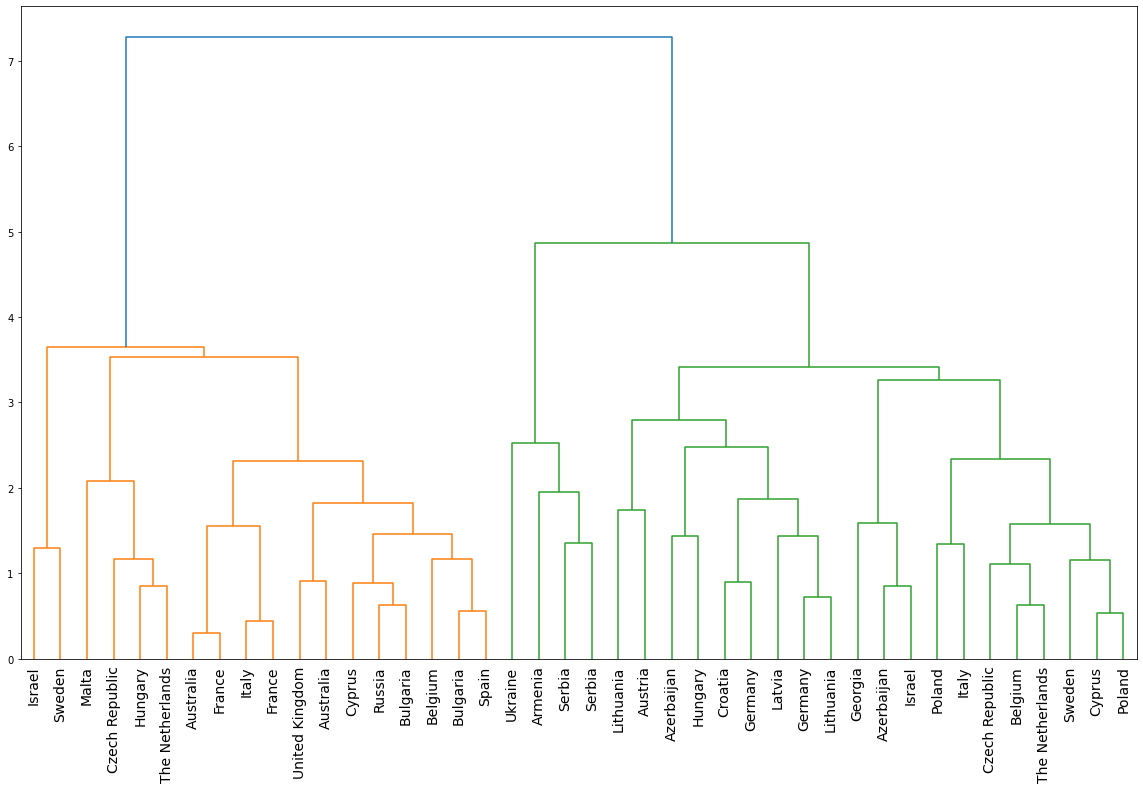

In [4]:
#Normalize a group of observations on a per feature basis.
#Before running k-means, it is beneficial to rescale each feature dimension of the observation set with whitening.
#Each feature is divided by its standard deviation across all observations to give it unit variance.
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import linkage, dendrogram

df_scaled = whiten(samples)

mergings = linkage(df_scaled, method='complete')

plt.figure(figsize=(20,12))

dn = dendrogram(
    mergings,
    labels=country_names,
    leaf_rotation=90,
    leaf_font_size=14
)

plt.show()

### Linkage method

Hierachical clustering의 기본 원리는 두 클러스터 사이의 거리를 측정해서 거리가 가까운 클러스터끼리 묶는 방식이다.  그러면 두 클러스터의 거리를 측정할때 어디를 기준점으로 할것인가를 결정해야 한다.

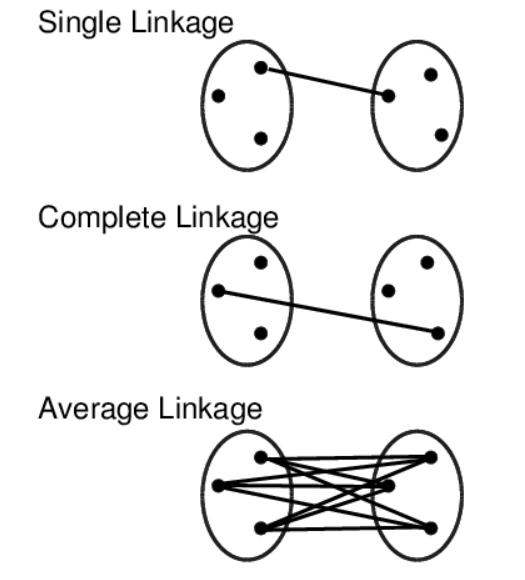

* complete linkage 방식은 두 클러스터상에서 가장 먼 거리를 이용해서 측정하는 방식  
* single linkage 방식은 두 클러스터에서 가장 가까운 거리를 사용하는 방식
* average linkage 방식은 각 클러스터내의 각 점에서 다른 클러스터내의 모든 점사이의 거리에 대한 평균을 사용하는 방식이다. 

linkage 방식에 따라서 군집이 되는 모양이 다르기 때문에, 데이타의 분포에 따라서 적절한 linkage  방식을 변화 시켜가면서 적용해가는 것이 좋다.

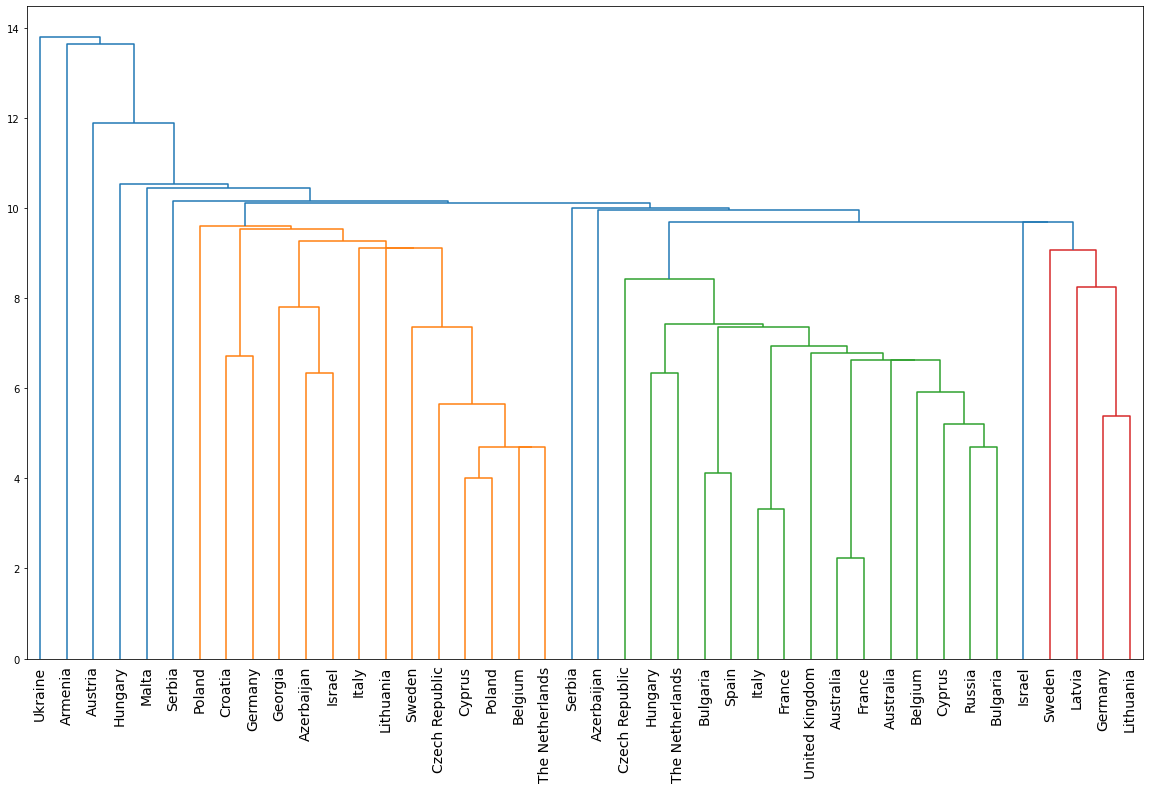

In [5]:
# sigle linkage 

plt.figure(figsize=(20,12))

mergings = linkage(samples, method='single')



dn = dendrogram(
    mergings,
    labels=country_names,
    leaf_rotation=90,
    leaf_font_size=14
)

plt.show()

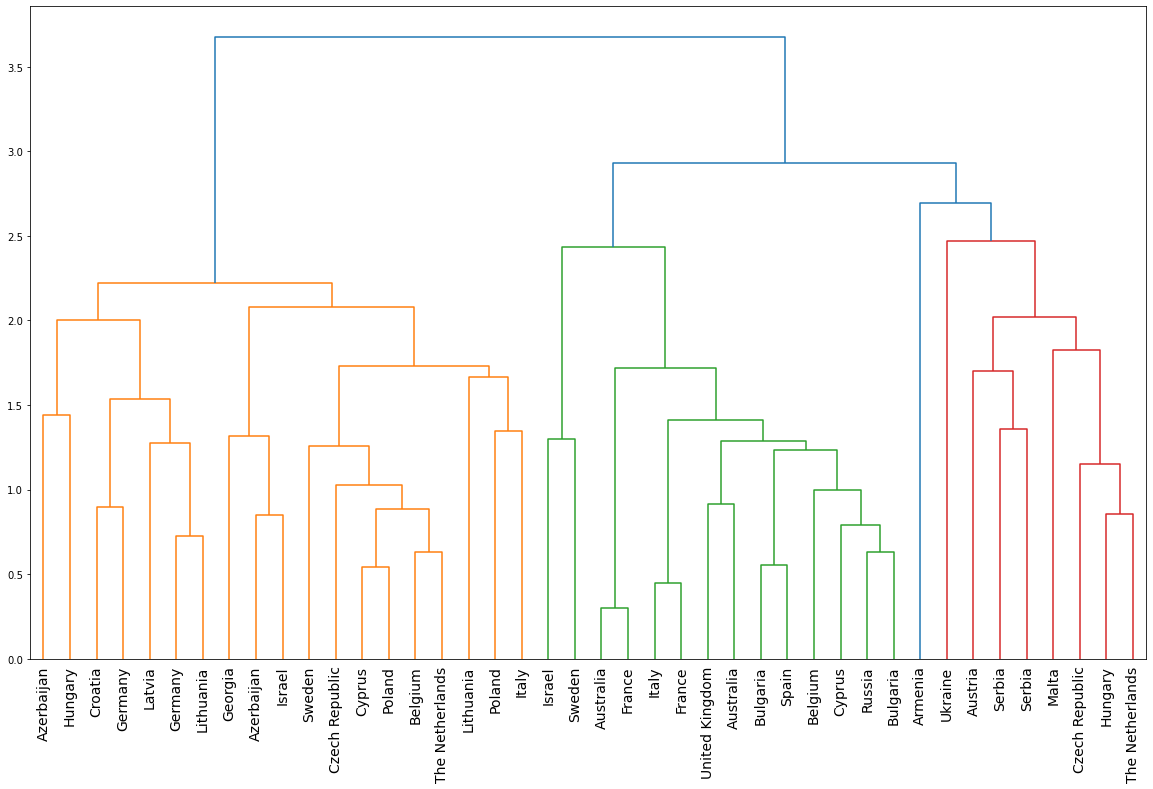

In [6]:
# average linkage
plt.figure(figsize=(20,12))

mergings = linkage(df_scaled, method='average')



dn = dendrogram(
    mergings,
    labels=country_names,
    leaf_rotation=90,
    leaf_font_size=14
)

plt.show()

### Extracting the cluster labels

계층 분석은 최종적으로 1개의 군집으로 모든 데이타를 클러스터링 하는데, 그렇다면 n개의 군집으로 나누려면 어떻게 해야 하는가?

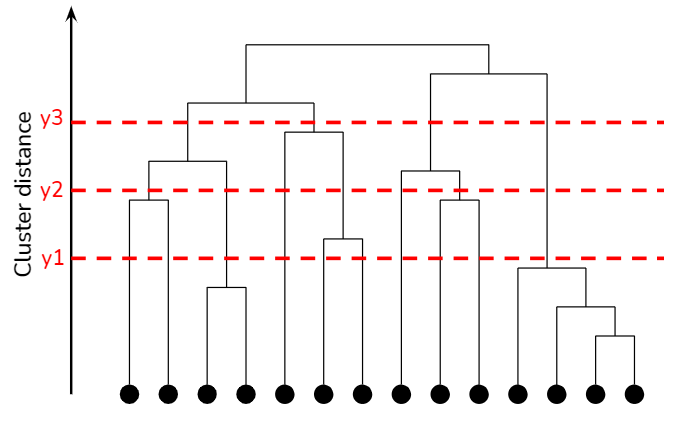

적정 y 값에서 클러스터링을 멈추면 n개의 군집 까지만 클러스터링이 되는데,  
y 값을 1 에서 클러스터링을 멈춰서 총 1개의 클러스터로 구분을 한 결과  
y 값을 2에서 클러스터링을 멈춰서 총 2개의 클러스터로 구분을 한 결과  
y 값을 3 에서 클러스터링을 멈춰서 총 3개의 클러스터로 구분을 한 결과  

In [7]:
# seed 데이터 활용

seed = pd.read_csv('data/Grains/seeds.csv', header = None)
seed.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [8]:
seed[7] = seed[7].map({1:'Kama wheat', 2:'Rosa wheat', 3:'Canadian wheat'})
seed.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [9]:
samples = seed.iloc[:, :-1].values
varieties = seed.iloc[:, -1].values

In [10]:
from scipy.cluster.hierarchy import fcluster

mergings = linkage(samples, method='complete')

labels = fcluster(mergings, 6, criterion='distance')

df = pd.DataFrame({'labels': labels, 'varieties': varieties})

ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


### t-SNE for 2-dimensional maps

t-distributed stochastic neighbor embedding 소위 t-SNE라고 불리는 방법은 높은 차원의 복잡한 데이터를 2차원에 차원 축소하는 방법입니다. 낮은 차원 공간의 시각화에 주로 사용하며 차원 축소할 때는 비슷한 구조끼리 데이터를 정리한 상태이므로 데이터 구조를 이해하는 데 도움을 줍니다.


t-SNE는 매니폴드 학습의 하나로 복잡한 데이터의 시각화가 목적입니다. 높은 차원의 데이터를 2차원 또는 3차원으로 축소시켜 시각화 합니다.
t-SNE를 사용하면 높은 차원 공간에서 비슷한 데이터 구조는 낮은 차원 공간에서 가깝게 대응하며, 비슷하지 않은 데이터 구조는 멀리 떨어져 대응됩니다.

t-SNE method는 fit_transform만을 제공하므로 별도의 맞춤 및 변환 방법이 없다. 새 데이터가 들어온다면 재 실행해줘야 한다.  
t-SNE plot의 축에 해석가능한 의미는 없다


In [13]:
seed = pd.read_csv('data/Grains/seeds.csv', header = None)
samples = seed.iloc[:, :-1].values
varieties = seed.iloc[:, -1].values

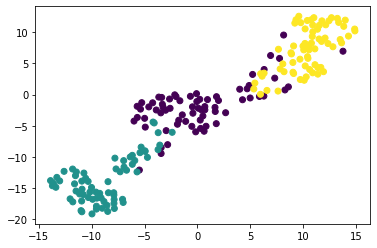

In [15]:
# Import TSNE (seed data 활용)
from  sklearn.manifold import TSNE
 
model = TSNE(learning_rate = 200)

tsne_features = model.fit_transform(samples)

xs = tsne_features[:,0]

ys = tsne_features[:,1]

plt.scatter(xs, ys , c = varieties)
plt.show()

In [16]:
stock = pd.read_csv('data/company-stock-movements-2010-2015-incl.csv', index_col = 0)
movements = stock.values
companies = stock.index.values

In [17]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalize_movements = normalizer.fit_transform(movements)

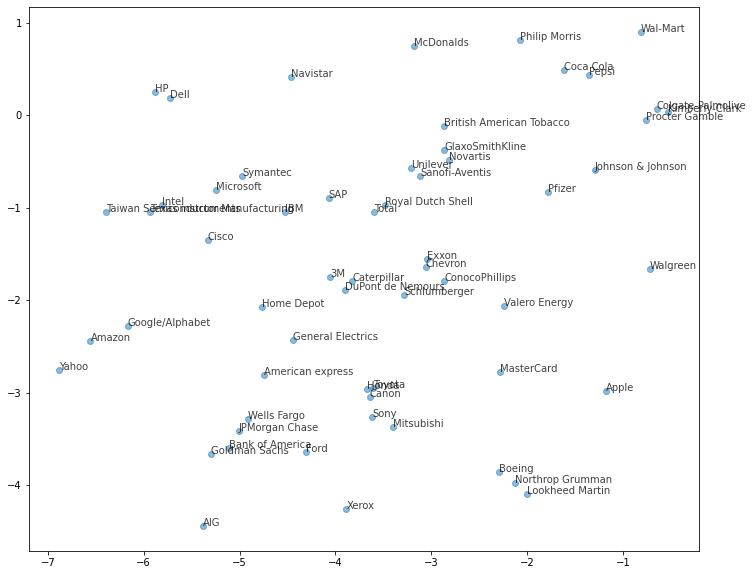

In [22]:
plt.rcParams['figure.figsize'] = [12,10 ]


model =  TSNE(learning_rate = 50)

tsne_features = model.fit_transform(normalize_movements)

xs = tsne_features[:,0]

ys = tsne_features[:,1]

plt.scatter(xs ,ys , alpha = 0.5)

for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show()